In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

%matplotlib inline

In [3]:
# Import the raw data of training features and labels
data_features = pd.read_csv("/Users/jackie/Documents/data_science/projects/predict_h1n1_and_seasonal_flu_vaccines/data/raw/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Training_Features.csv")
data_labels = pd.read_csv("/Users/jackie/Documents/data_science/projects/predict_h1n1_and_seasonal_flu_vaccines/data/raw/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Training_Labels.csv")

In [4]:
# Combine the raw data of training features and labels into one dataset
data = pd.merge(data_features, data_labels, how='inner', on='respondent_id')

In [4]:
# Understand the general data information on the raw data

In [5]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [6]:
data_features.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [5]:
# Subset of the Training Features data into only categorical features
data_features_categorical = data_features.select_dtypes(include='object')
categorical_cols = data_features_categorical.columns

# Subset of the Training Features data into only continuous features
data_features_continuous = data_features.select_dtypes(include='float64')
continuous_cols = data_features_continuous.columns


In [6]:
# Unique count of each categorical features
data_features_categorical.nunique()

age_group                 5
education                 4
race                      4
sex                       2
income_poverty            3
marital_status            2
rent_or_own               2
employment_status         3
hhs_geo_region           10
census_msa                3
employment_industry      21
employment_occupation    23
dtype: int64

In [9]:
#- Training Features Foundings
#- Data Types: 23 float, 12 categorical
#- Shape: 36 features, 26707 rows
#- Datetime feature: No
#- Missing values: Yes, on 30 features
#- Reminders: 
#    - Conintuous features are survey questions with answers ranging within 5
#    - Alert: 2 categorical features have more than 20 categories. Since they are nominal, doing one-hot-encoding will expand the feature numbers

In [10]:
print(continuous_cols)

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')


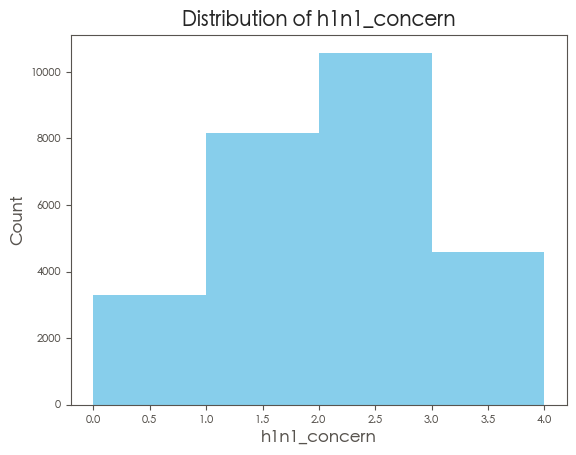

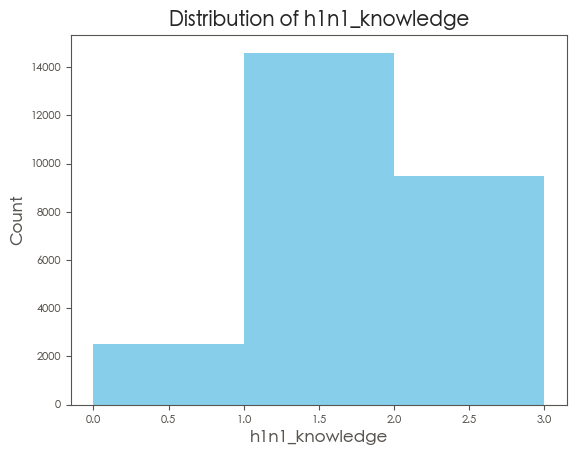

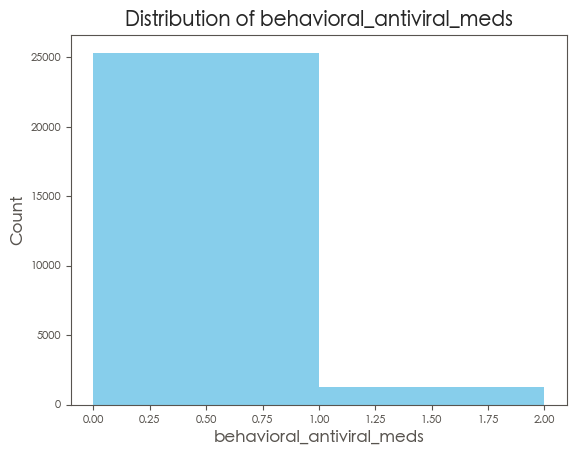

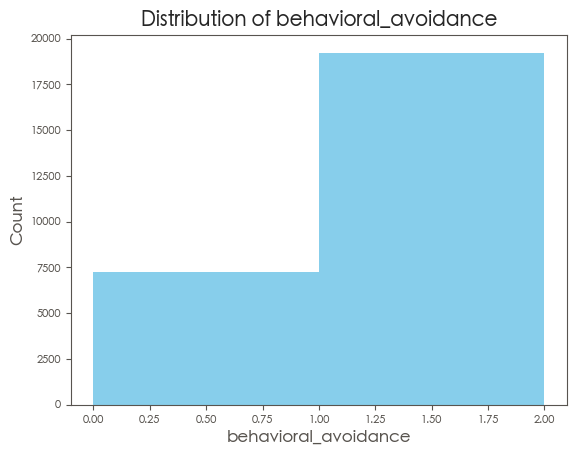

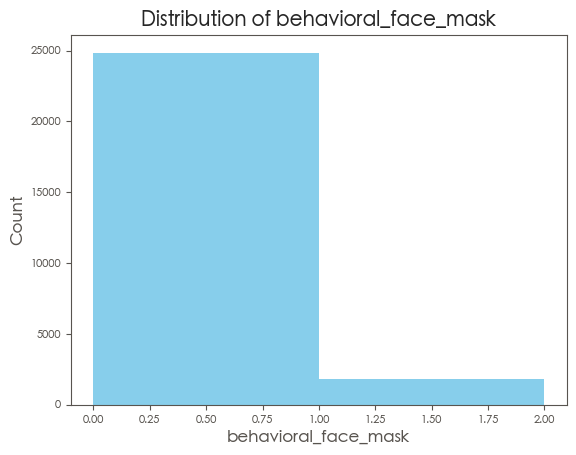

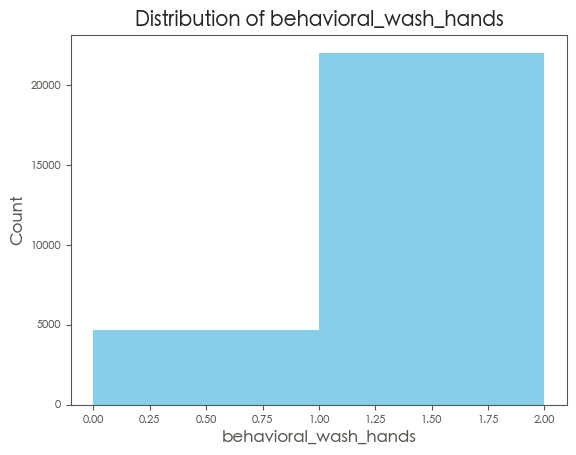

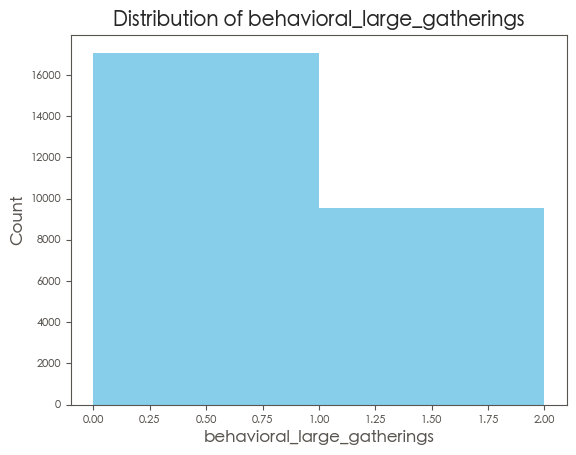

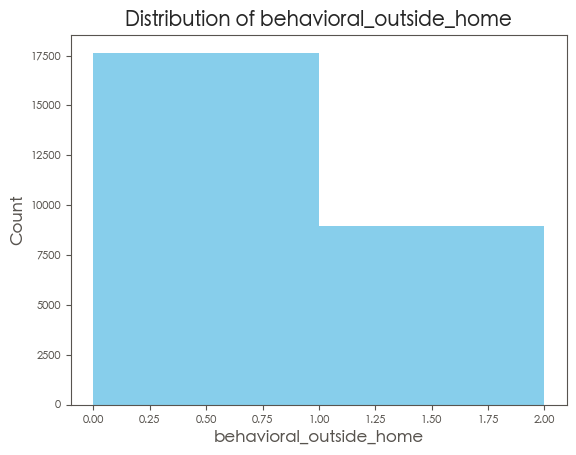

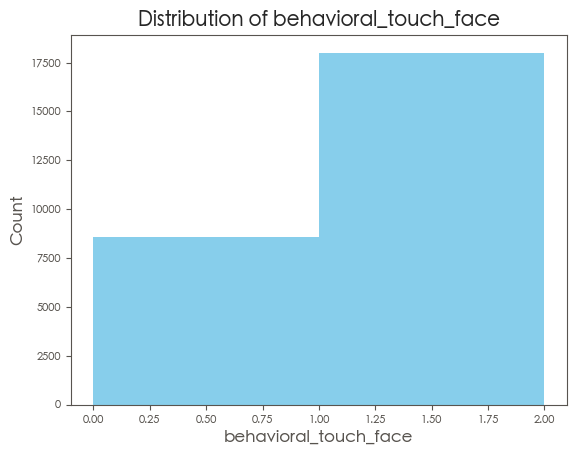

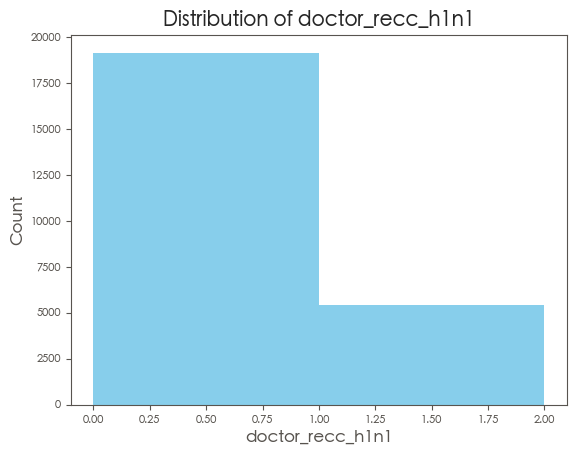

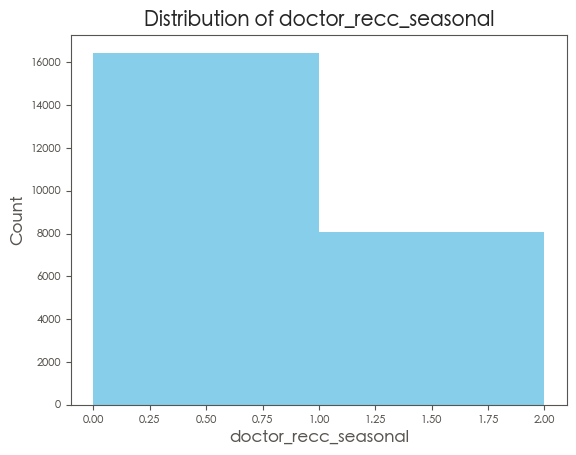

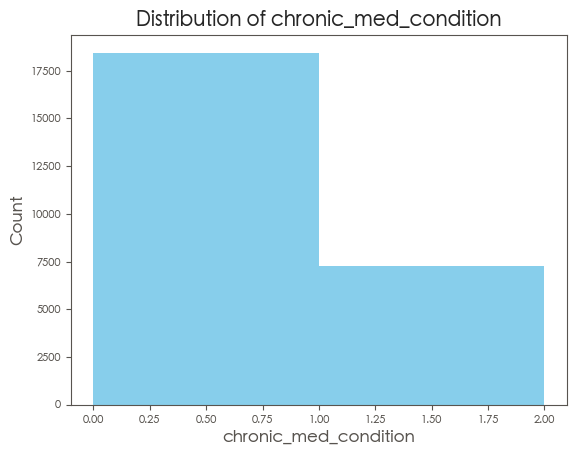

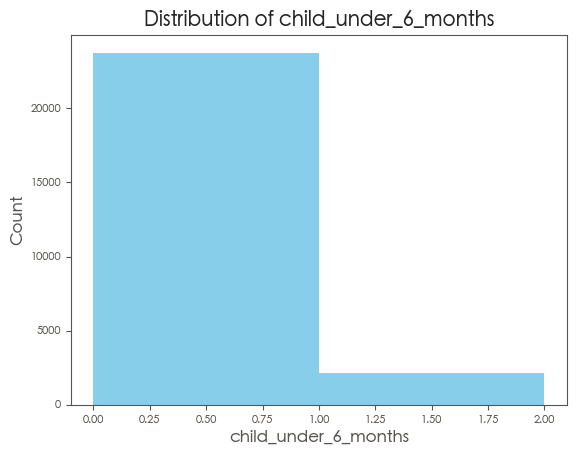

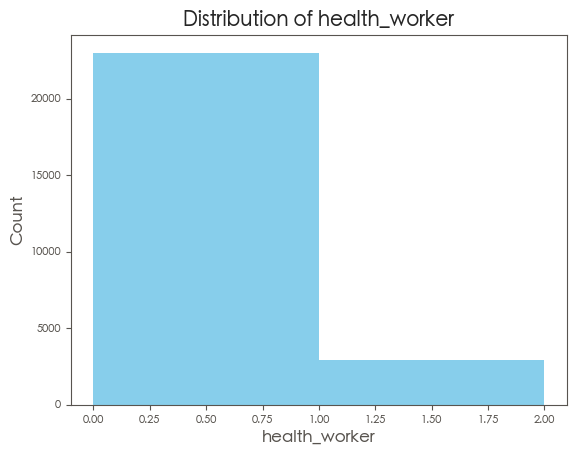

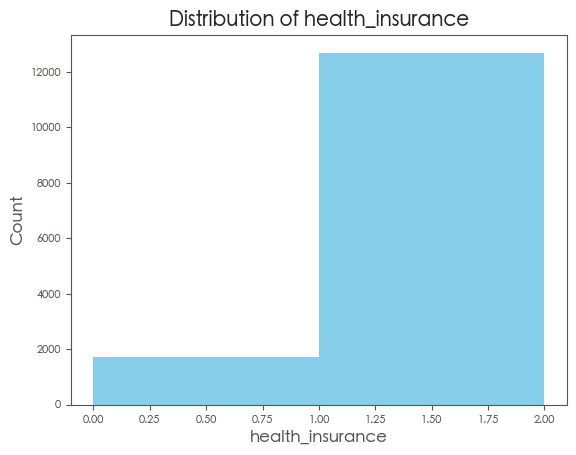

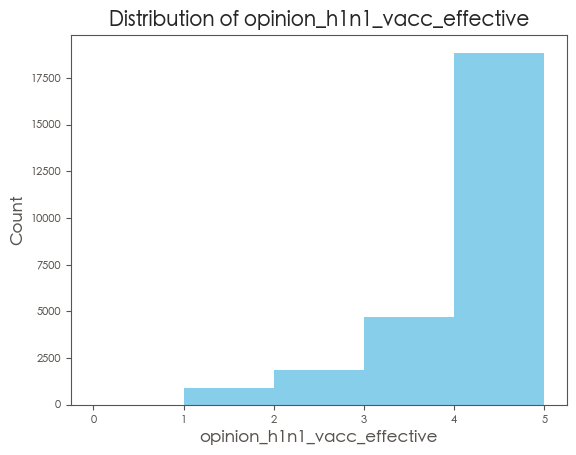

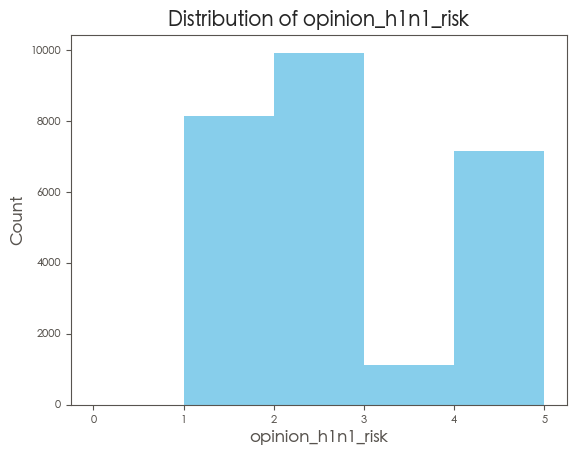

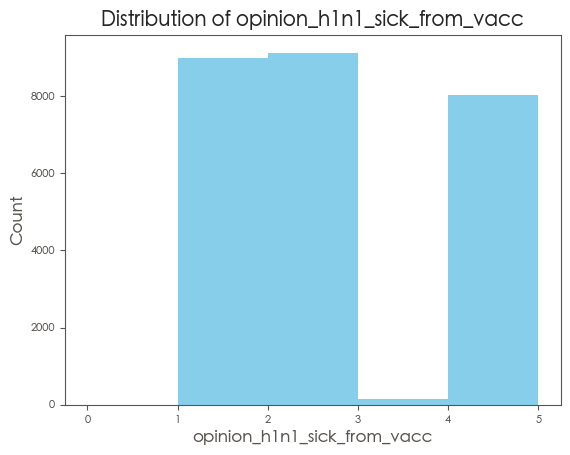

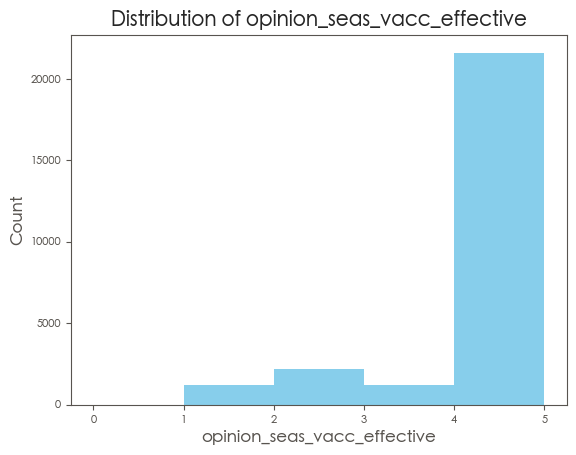

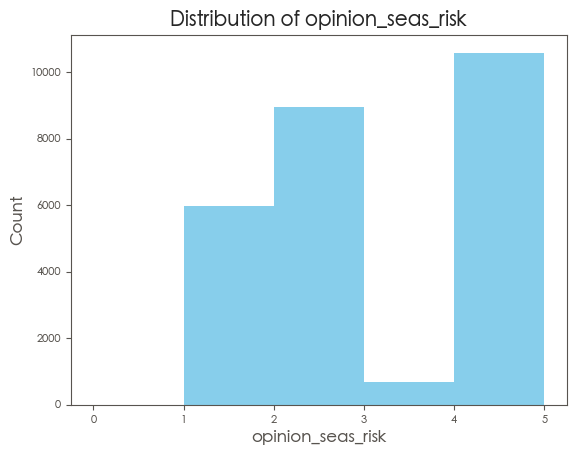

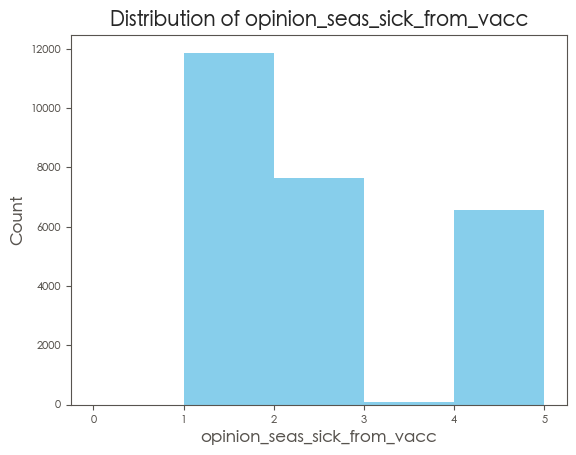

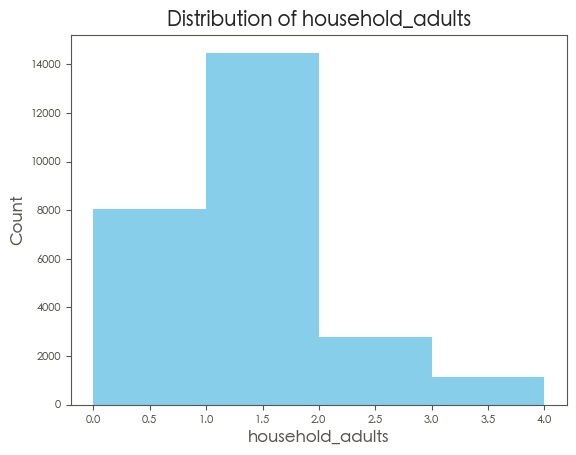

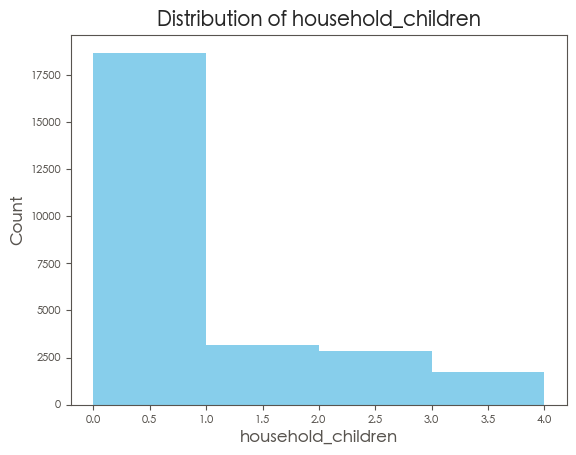

In [94]:
# Distribution of continuous coloums
for col in continuous_cols:
    bin_size = list(range(data_features[col].nunique()+1))
    plt.hist(data_features[col], bins=bin_size, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

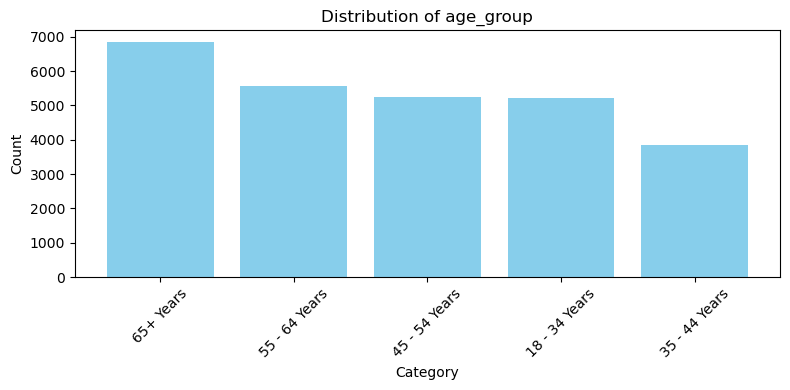

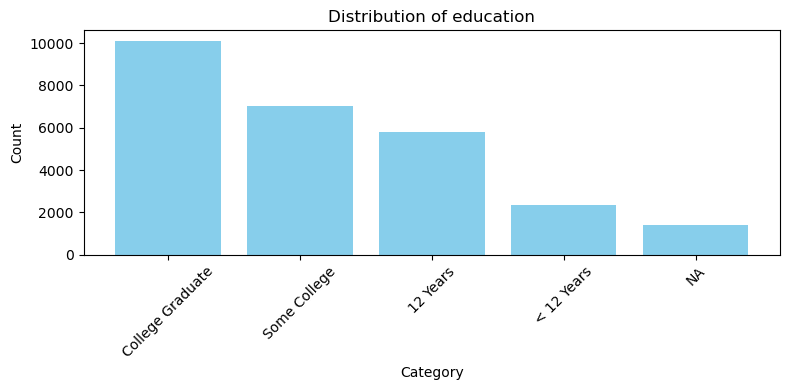

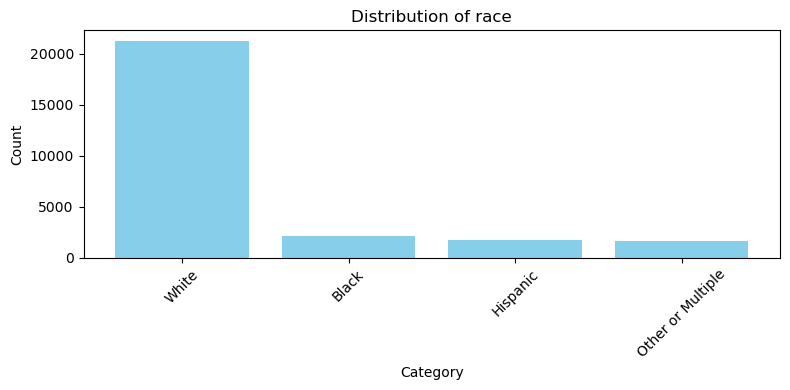

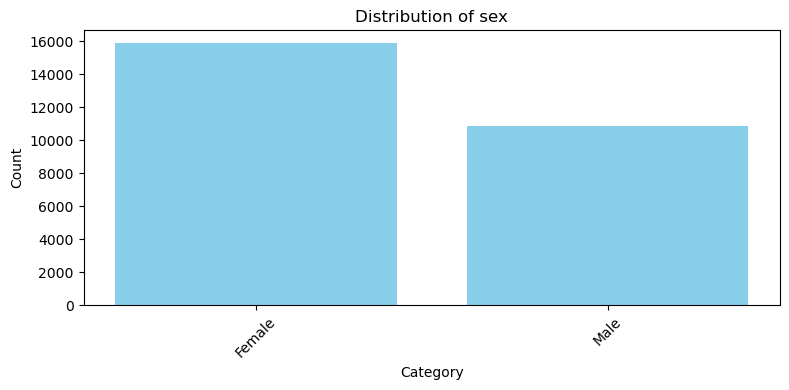

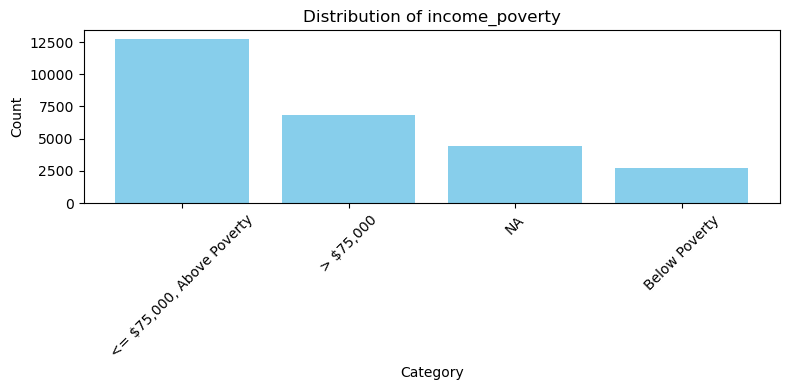

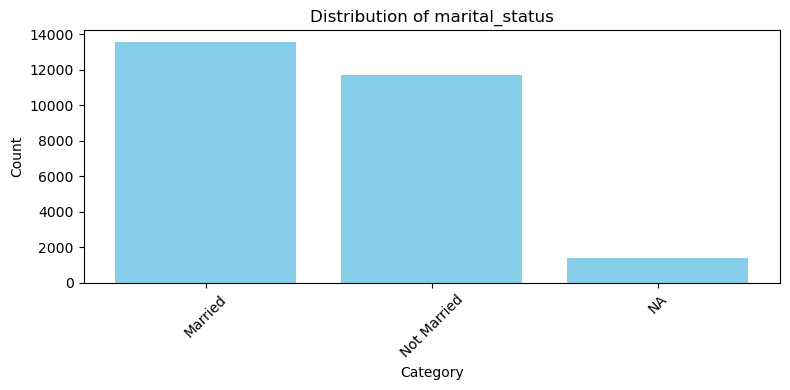

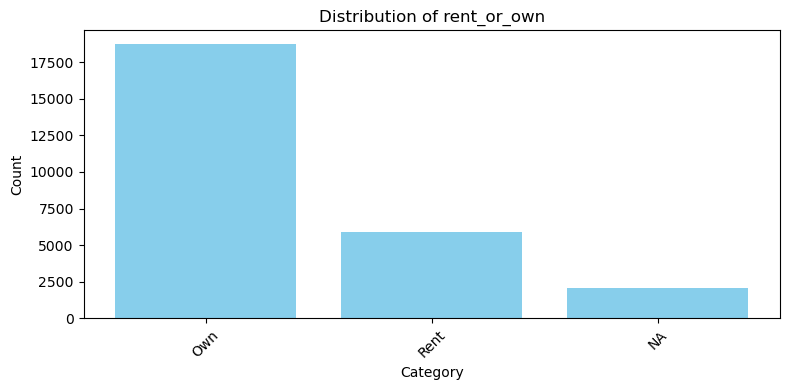

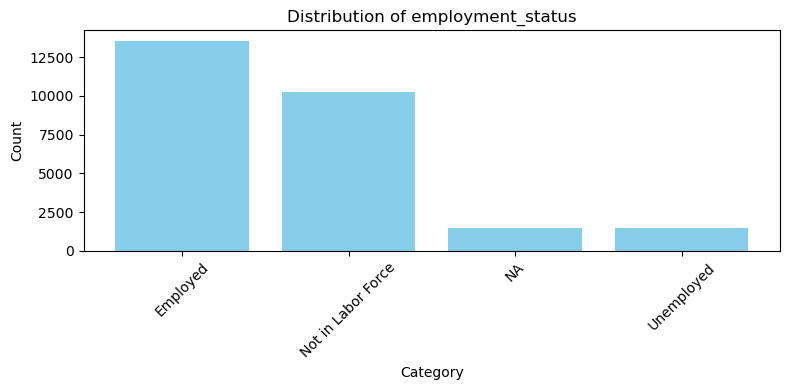

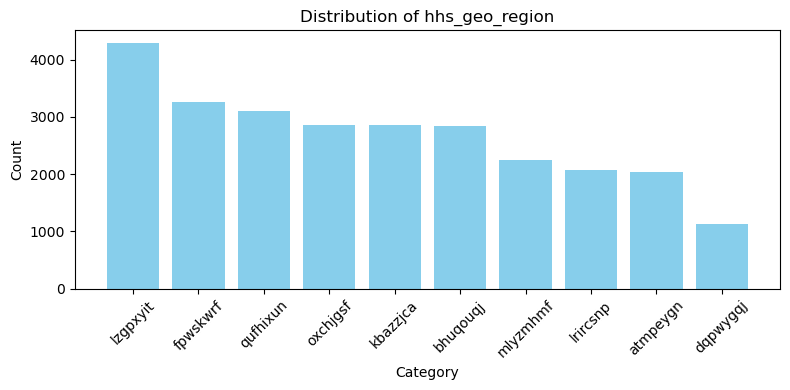

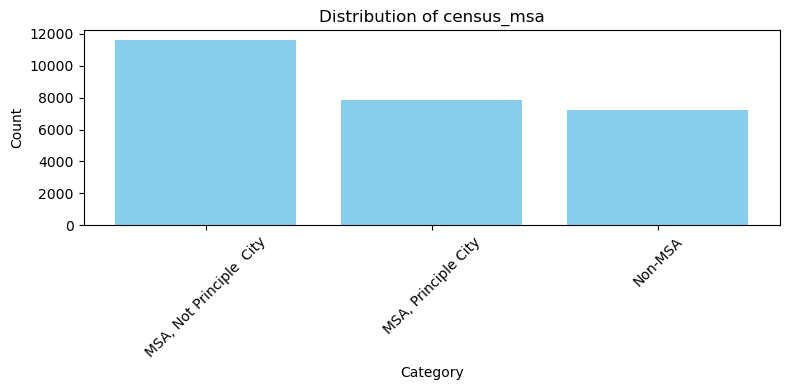

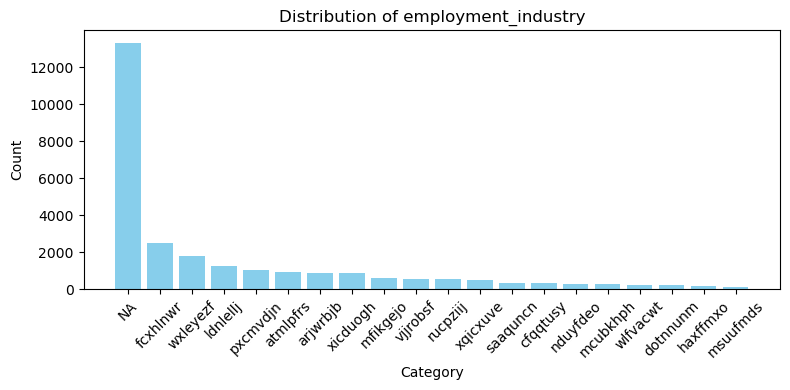

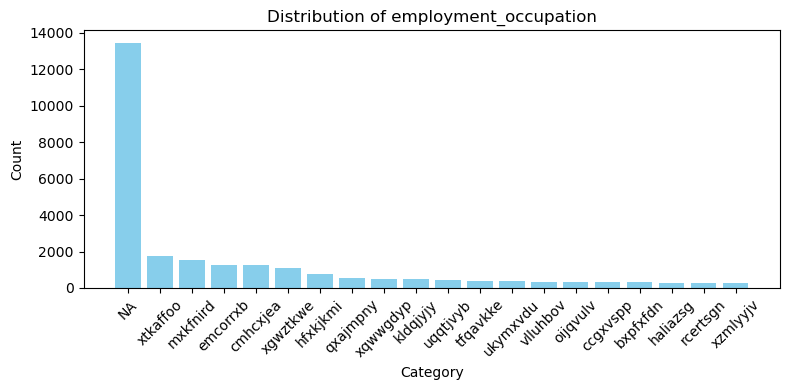

In [96]:
# Distribution of categorical coloums
for col in categorical_cols:
    counts = data_features[col].fillna('NA')
    counts = counts.value_counts().head(20)
    plt.figure(figsize=(8, 4))
    plt.bar(counts.index.astype(str), counts.values, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [60]:
# Summary on the distribution of categorical columns
# Age group: quite evenly distributed, most '65+ Years', least '35-44 Years'
# Education: dominated by 'College Graduate'
# Race: Most is 'White'
# Sex: 'Female' > 'Male', diff is around 4k
# Income: dominated by '<= $75,000, Above Poverty'; while '> $75,000' is greater than 'Below Poverty'
# Marital status: quite evenly distributed, 'Married' > 'Not Married', diff around 1k
# Property: Most is 'Own'
# Employment status: dominated by 'Employed', diff between 2nd largest 'Not in Labor Force' is around 2k
# Geo regions: dominated by 'Izgpxyit', the least is 'dapwygai', others quite evenly distributed 
# Census MSA: dominated by 'MSA, Not Principle City', while 'MSA, Principle City' and 'Non-MSA' is similar
# Employment industry: dominated by NA
# Employment occupation: dominated by NA

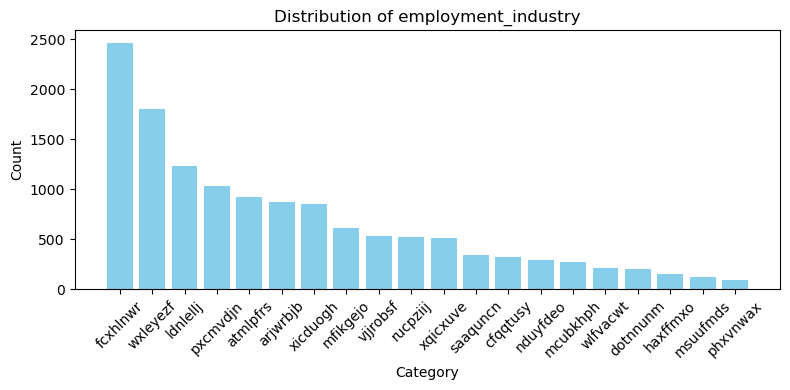

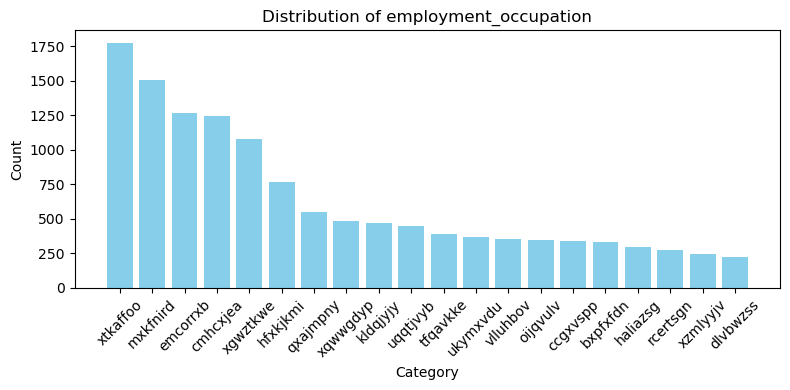

In [63]:
# To check on the distribution on Employment industry and Employment occupation which are dominated by NA
for col in ['employment_industry', 'employment_occupation']:
    counts = data_features[col]
    counts = counts.value_counts().head(20)
    plt.figure(figsize=(8, 4))
    plt.bar(counts.index.astype(str), counts.values, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

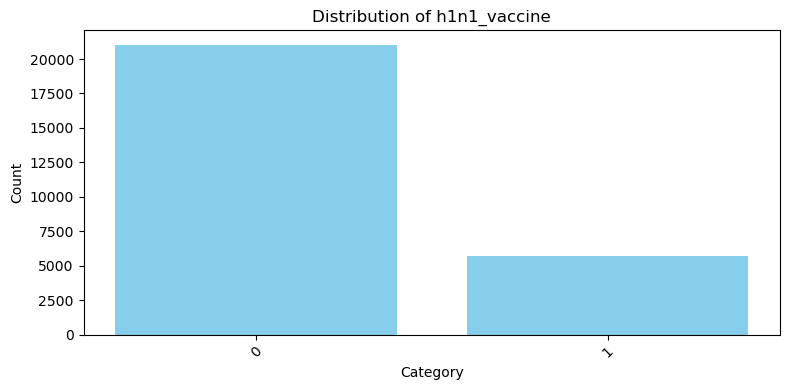

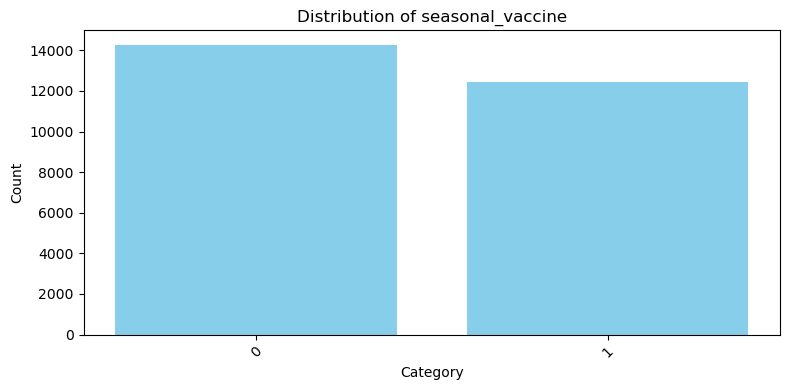

In [65]:
# Distribution of target labels 'h1n1_vaccine' and 'seasonal_vaccine'
for col in ['h1n1_vaccine', 'seasonal_vaccine']:
    counts = data[col]
    counts = counts.value_counts()
    plt.figure(figsize=(8, 4))
    plt.bar(counts.index.astype(str), counts.values, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# vasccination of H1N1 is significantly low: 21%
# vasccination of seasonal flue is quite even: 47%

In [9]:
data_labels.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

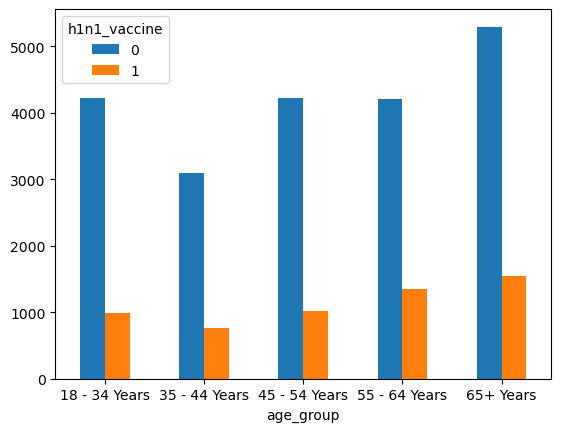

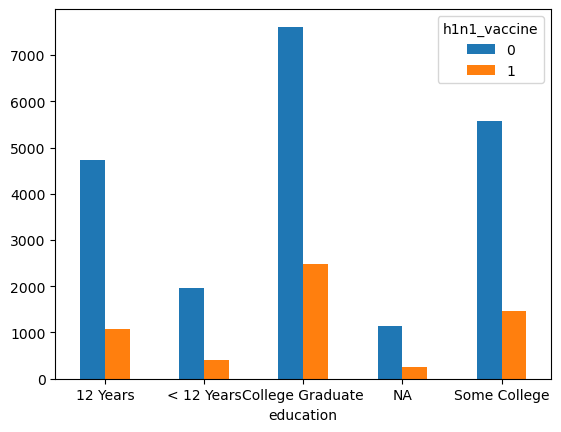

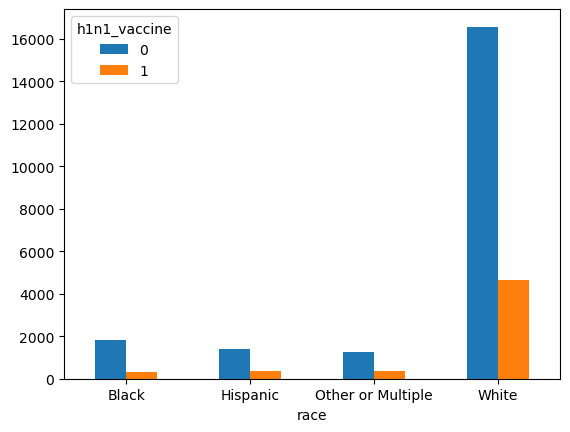

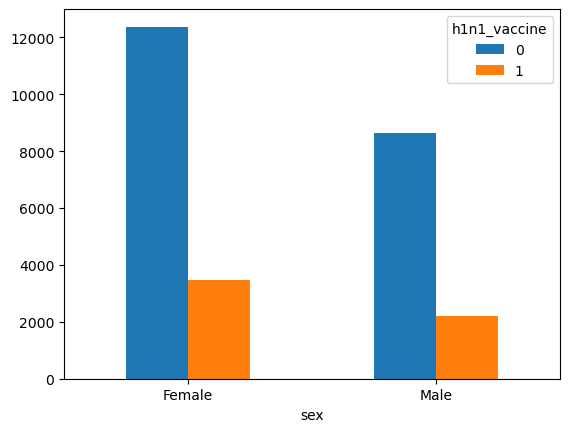

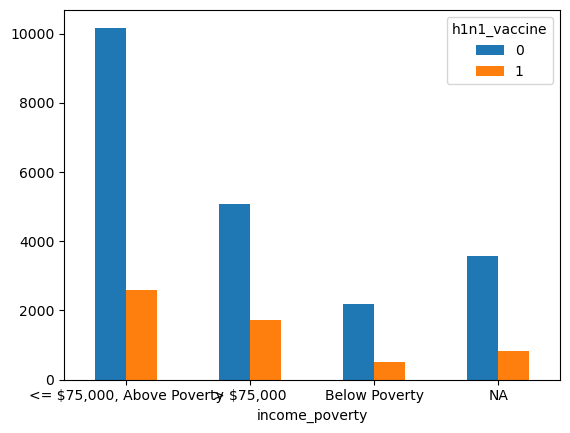

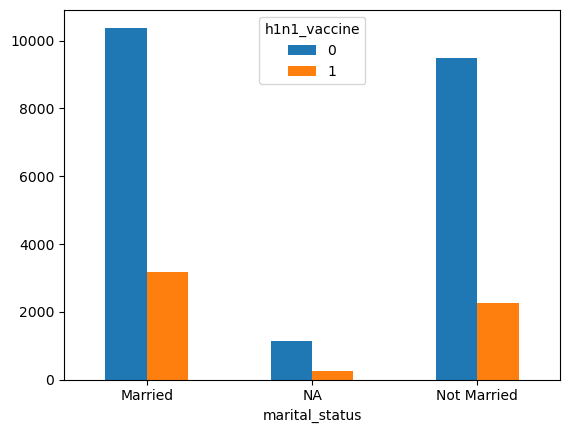

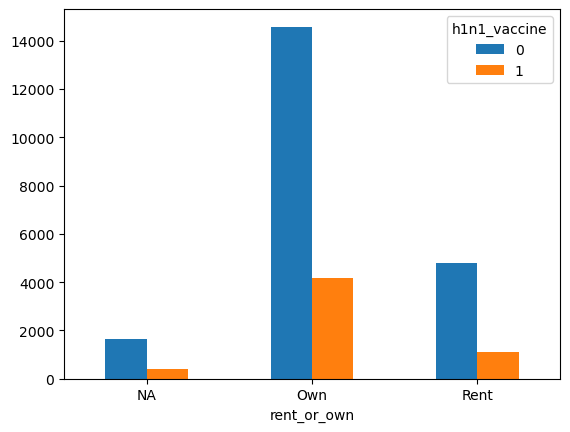

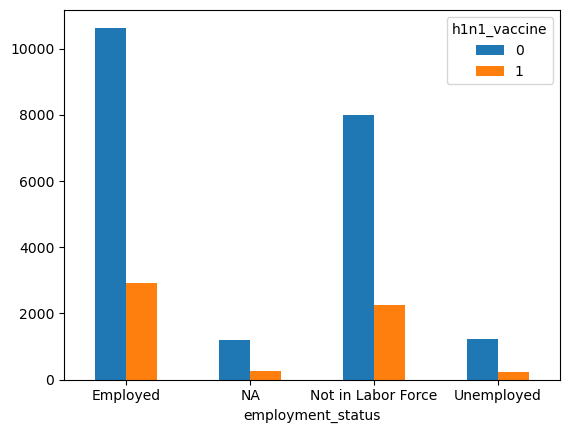

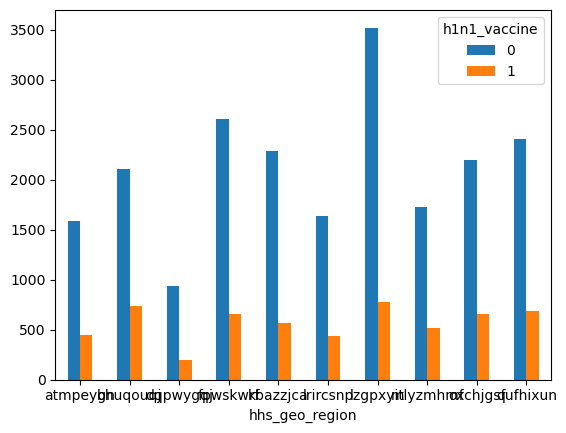

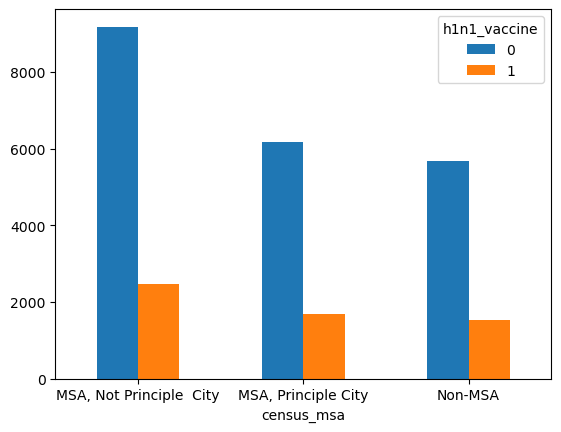

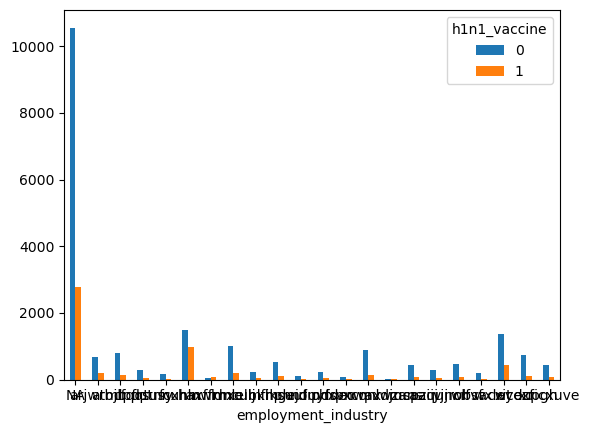

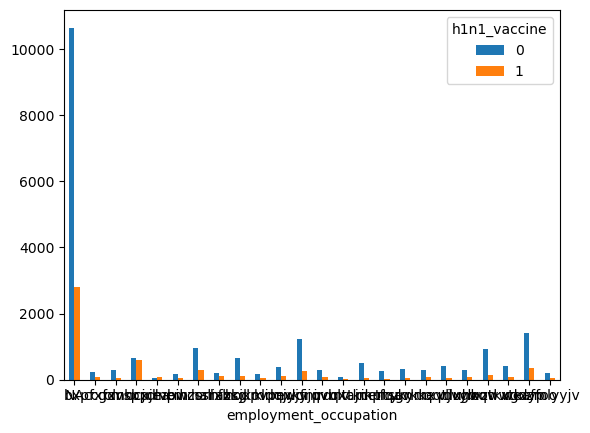

In [59]:
# Distribution of all catergorical columns, grouped by target label 'h1n1_vaccine'
# Missing values were replaced with 'NA' for visualization
for col in categorical_cols:
    temp_df = data[[col, 'h1n1_vaccine']].copy()
    temp_df[col] = temp_df[col].fillna('NA')
    cross_tab = pd.crosstab(temp_df[col], temp_df['h1n1_vaccine'])
    barplot = cross_tab.plot.bar(stacked=False, rot=0)
    plt.show()

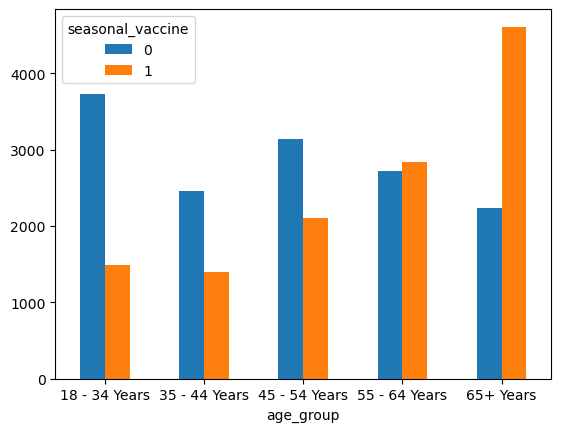

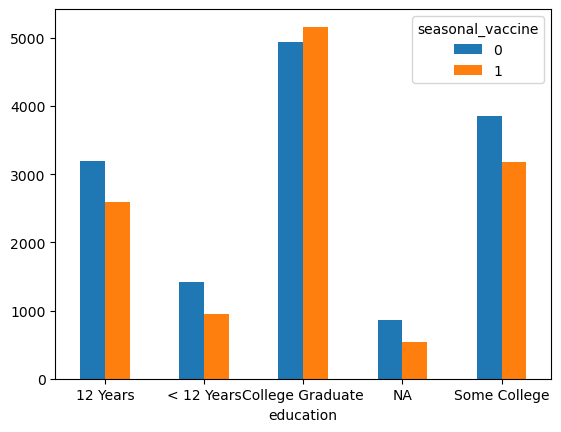

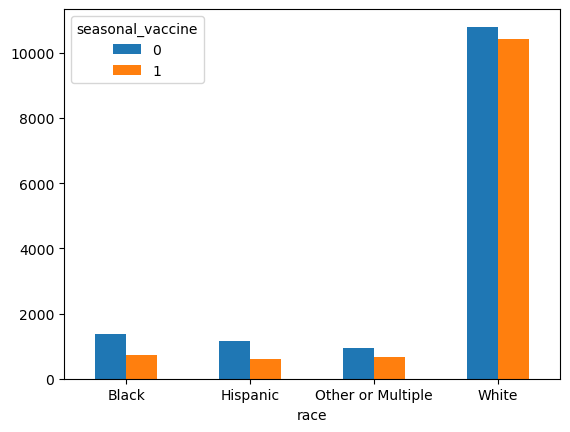

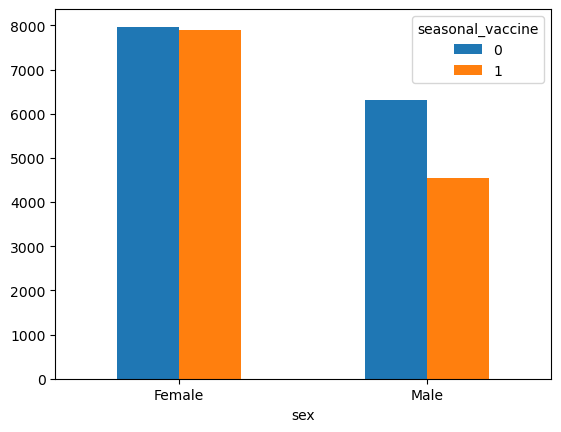

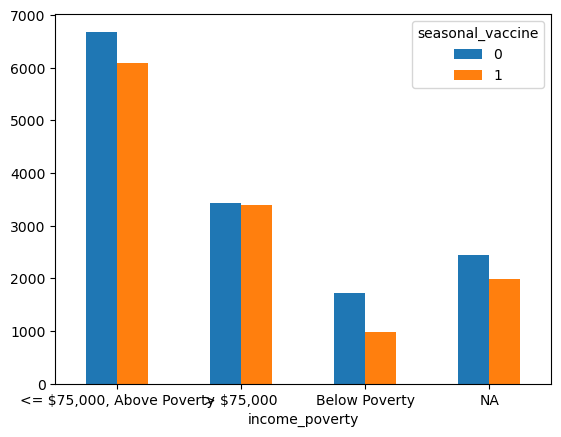

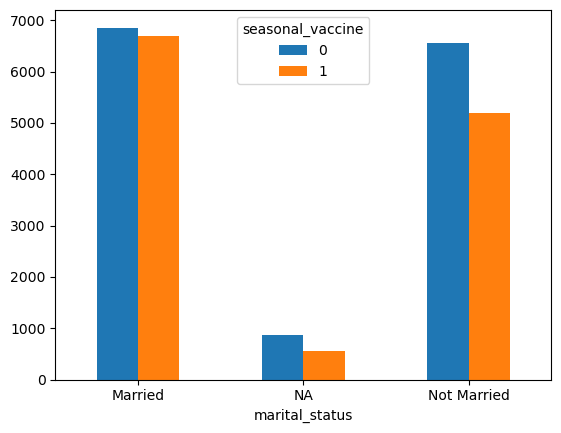

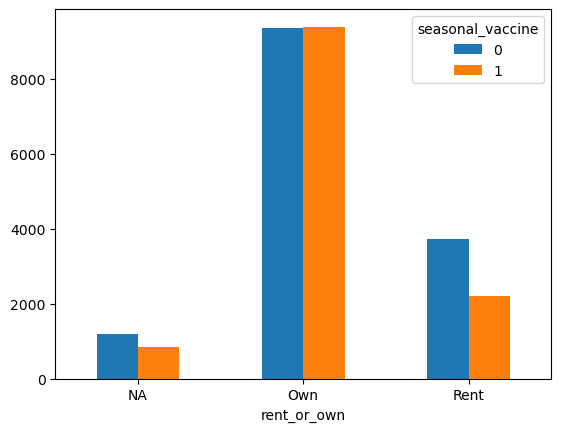

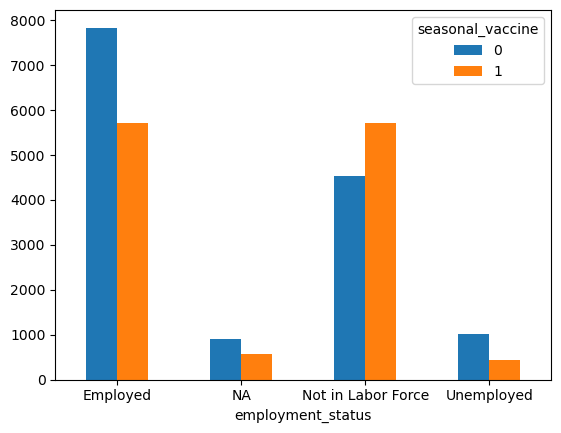

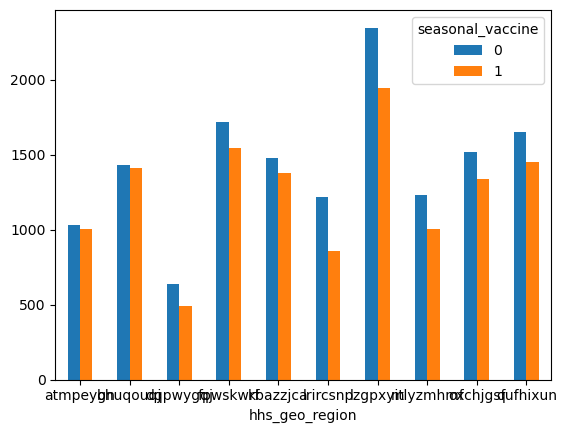

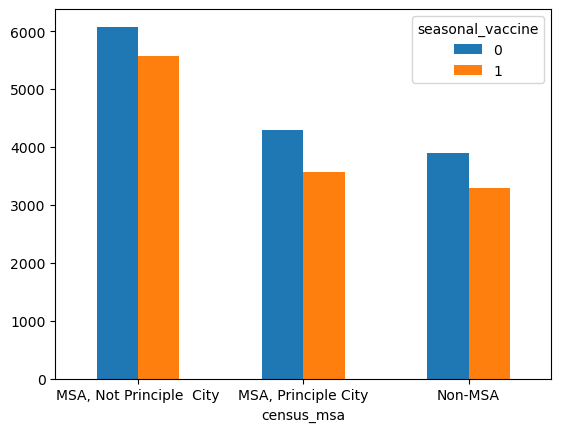

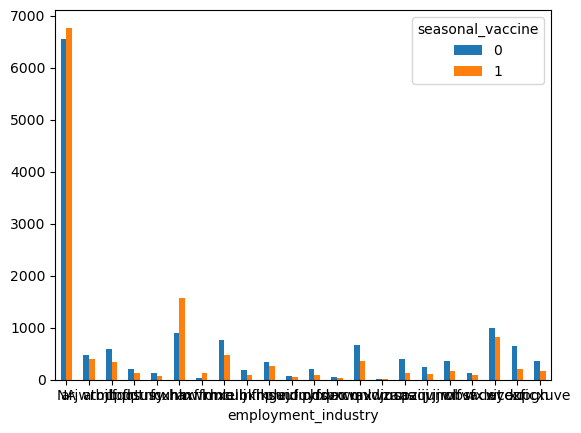

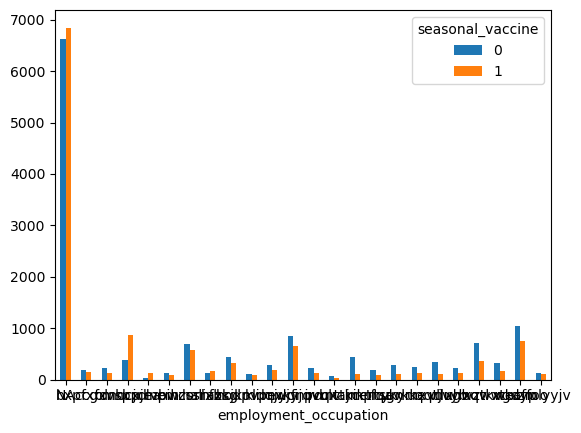

In [55]:
# Distribution of all catergorical columns, grouped by target label 'seasonal_vaccine'
# Missing values were replaced with 'NA' for visualization
for col in categorical_cols:
    temp_df = data[[col, 'seasonal_vaccine']].copy()
    temp_df[col] = temp_df[col].fillna('NA')
    cross_tab = pd.crosstab(temp_df[col], temp_df['seasonal_vaccine'])
    barplot = cross_tab.plot.bar(stacked=False, rot=0)
    plt.show()

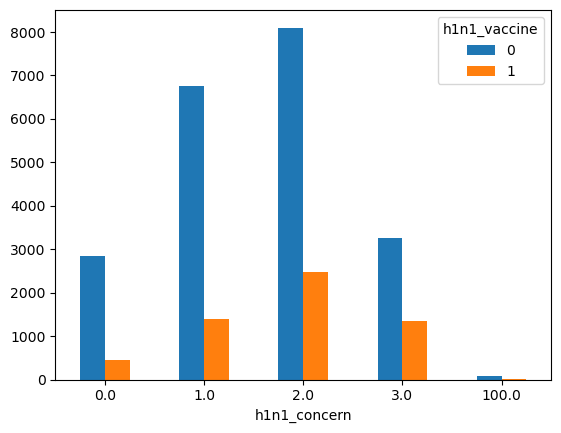

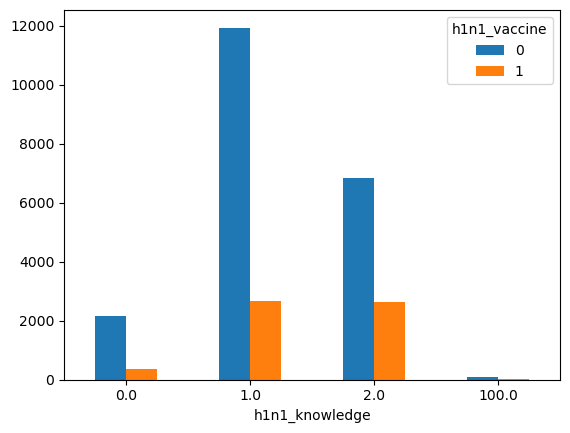

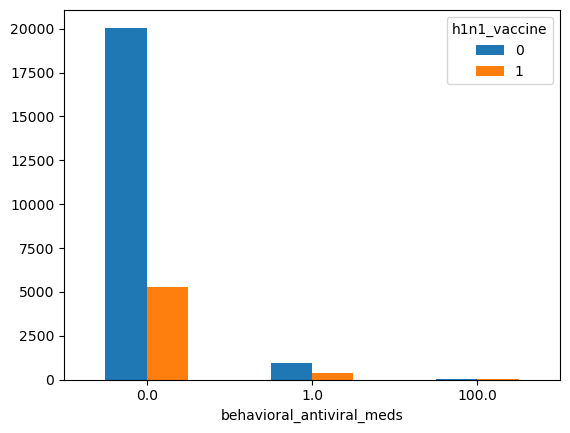

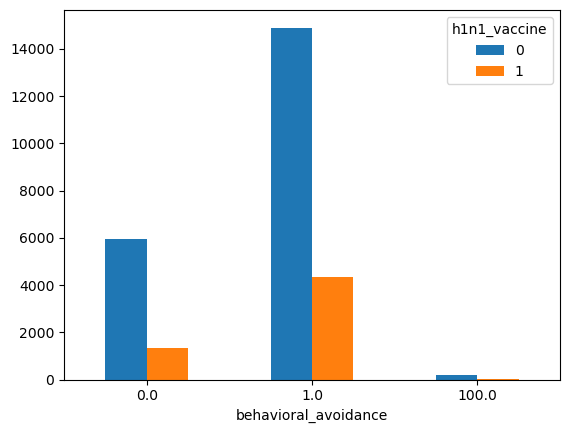

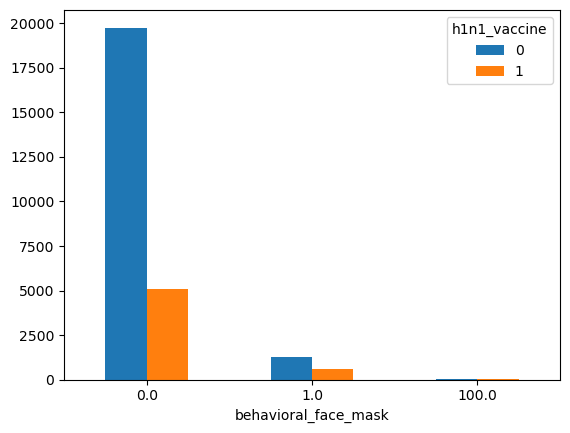

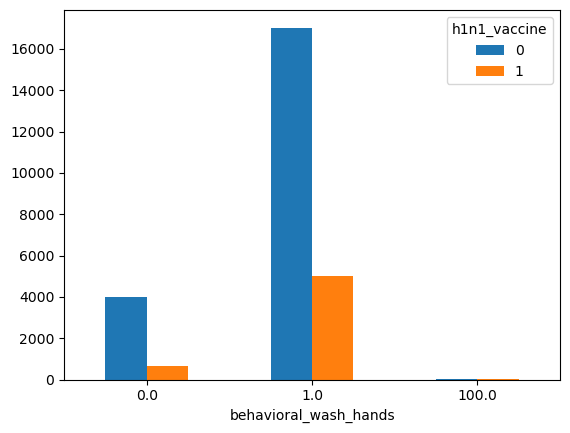

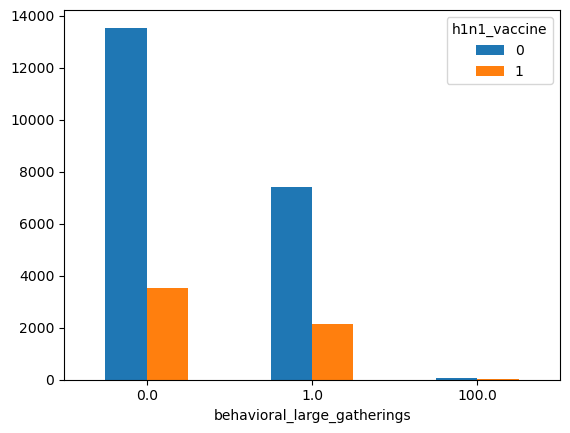

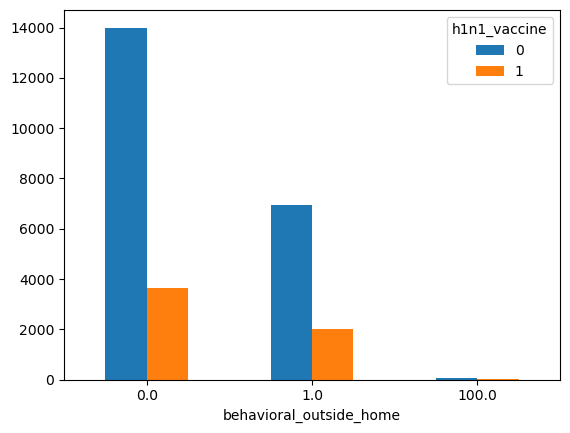

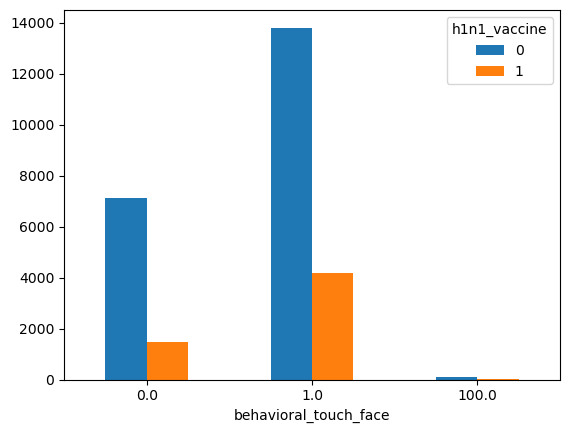

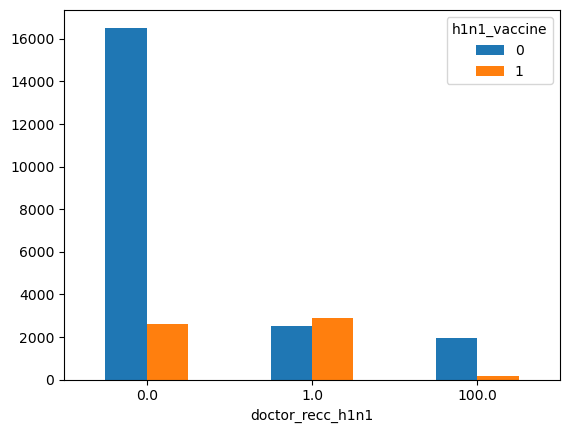

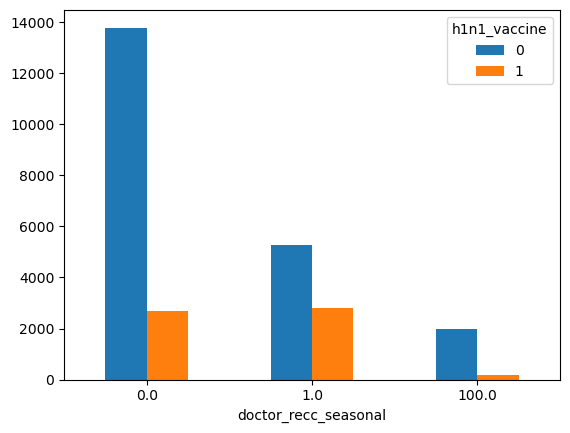

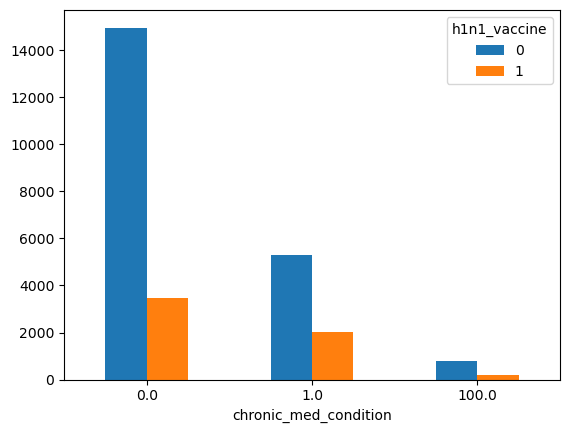

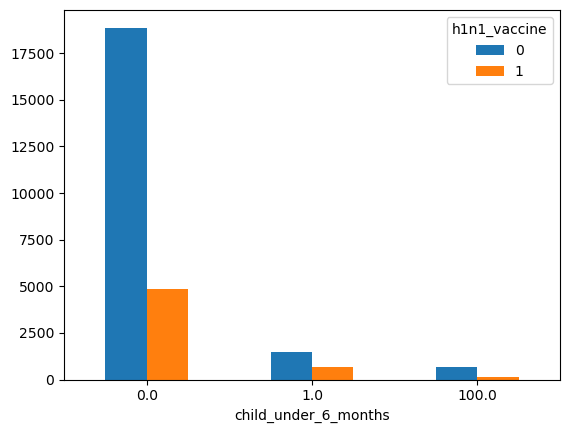

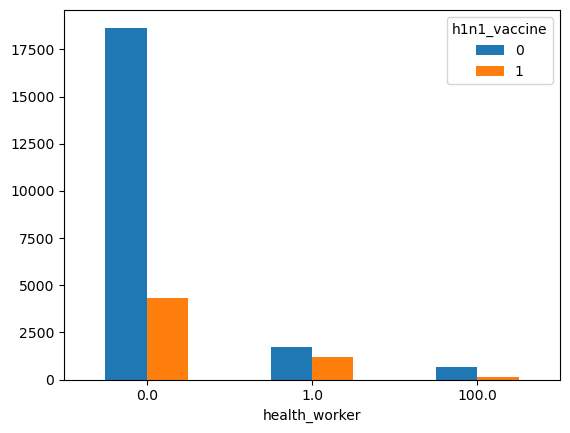

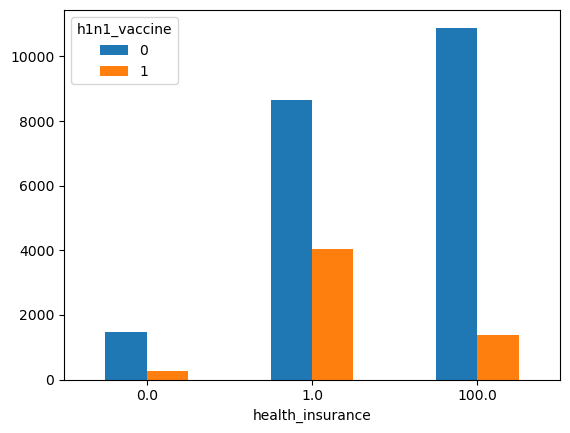

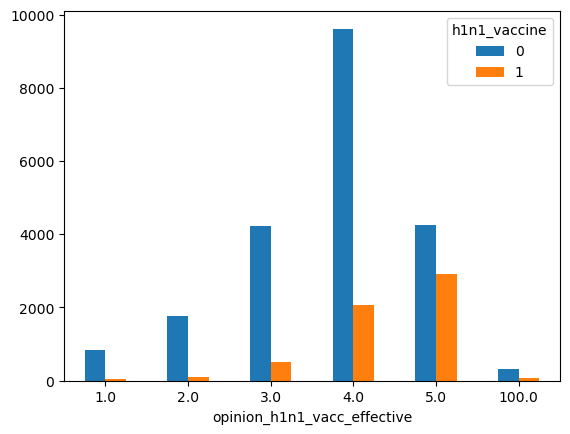

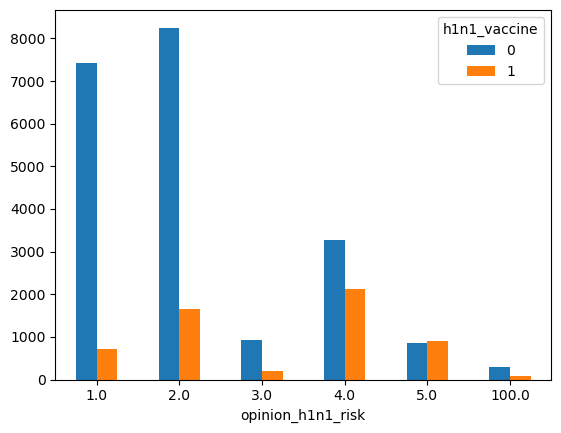

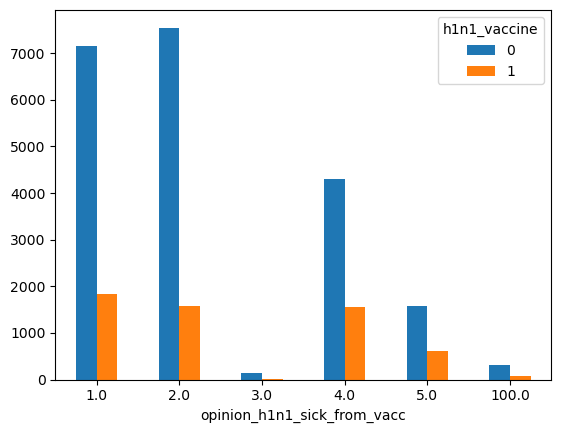

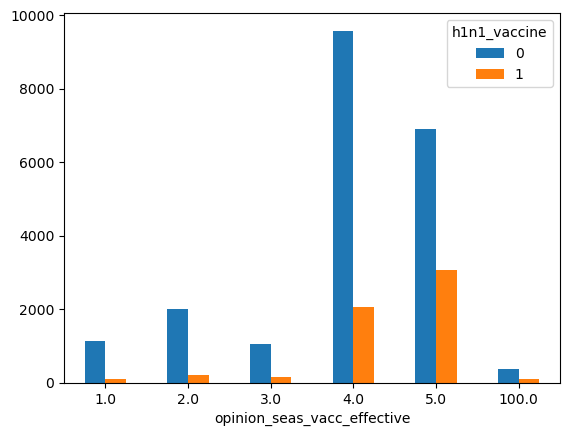

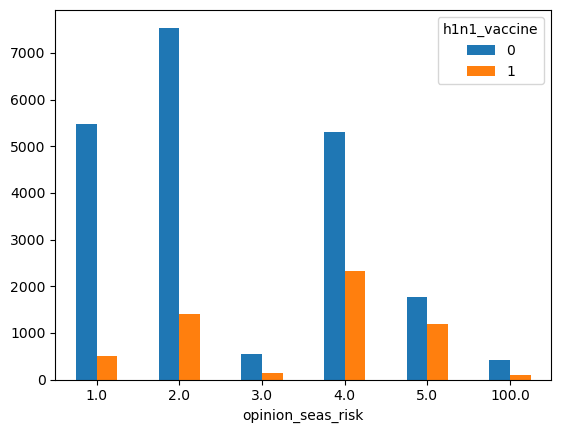

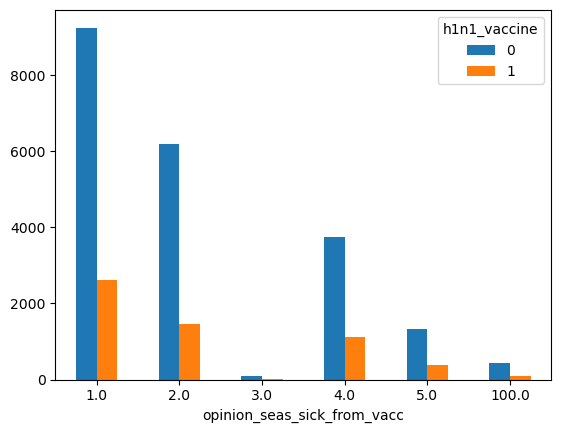

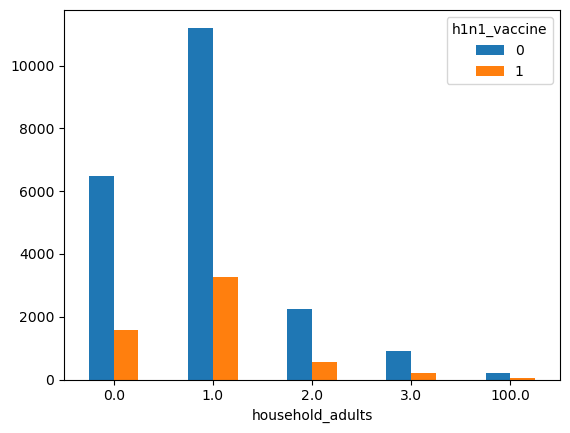

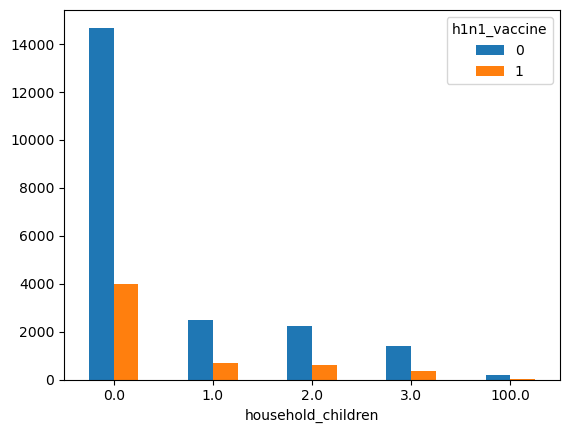

In [57]:
# Distribution of all continuous columns, grouped by target label 'h1n1_vaccine'
# Missing values were replaced with '100' for visualization
for col in continuous_cols:
    temp_df = data[[col, 'h1n1_vaccine']].copy()
    temp_df[col] = temp_df[col].fillna(100)
    cross_tab = pd.crosstab(temp_df[col], temp_df['h1n1_vaccine'])
    barplot = cross_tab.plot.bar(stacked=False, rot=0)
    plt.show()

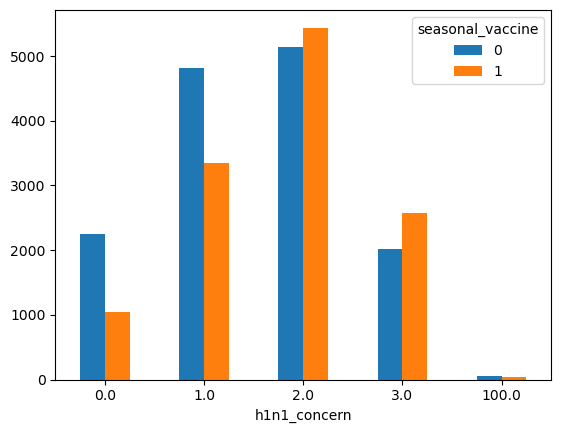

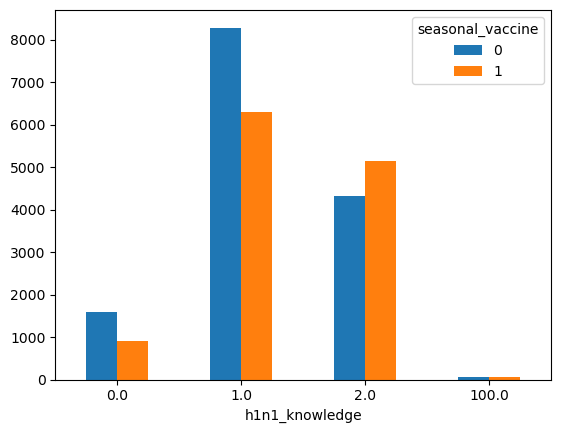

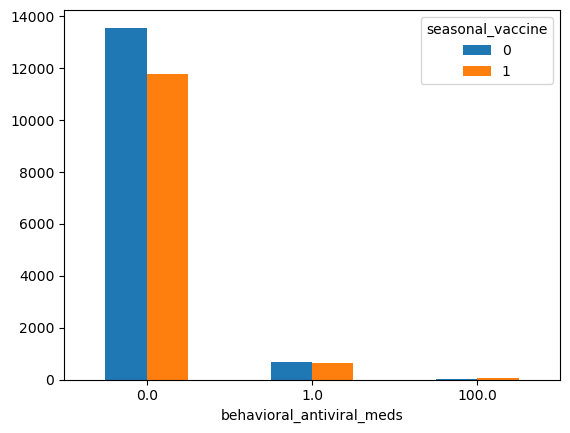

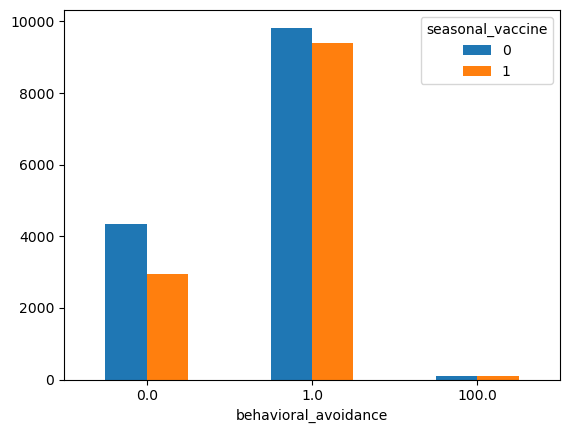

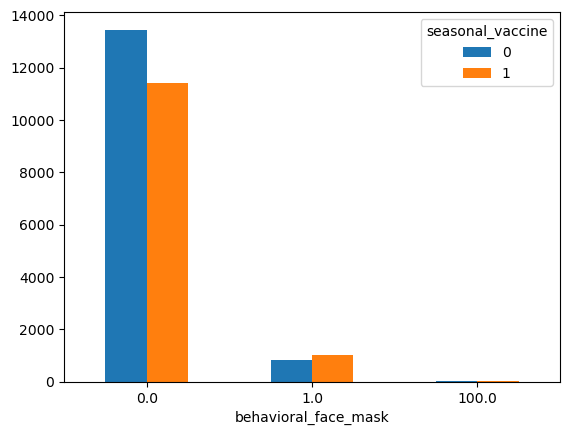

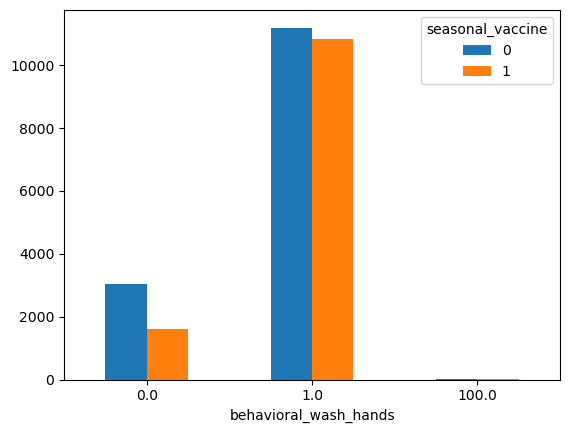

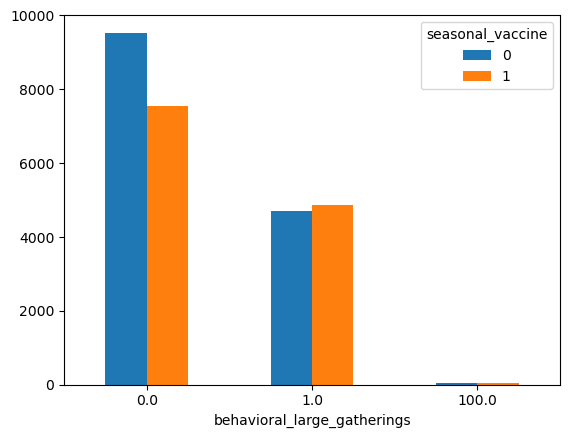

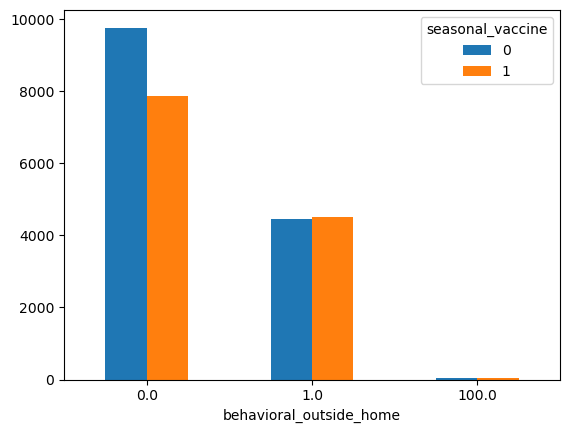

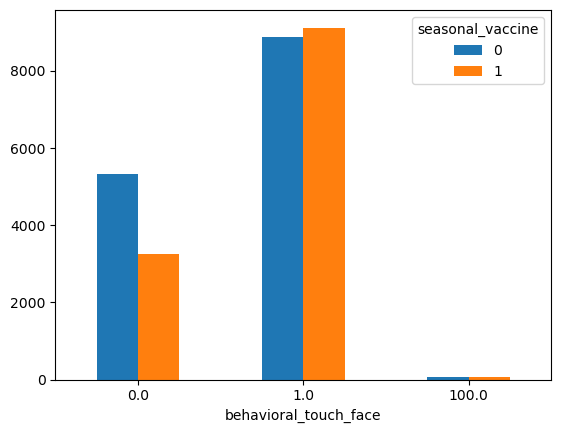

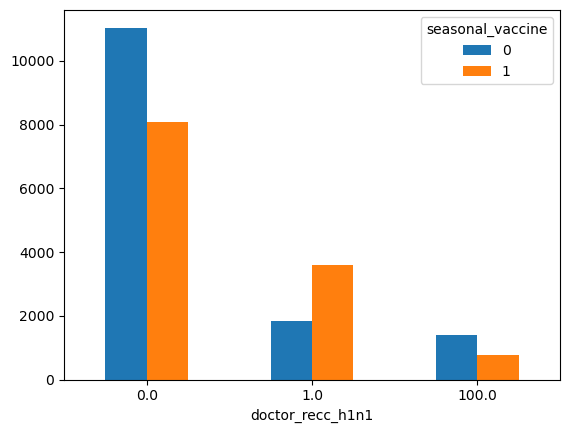

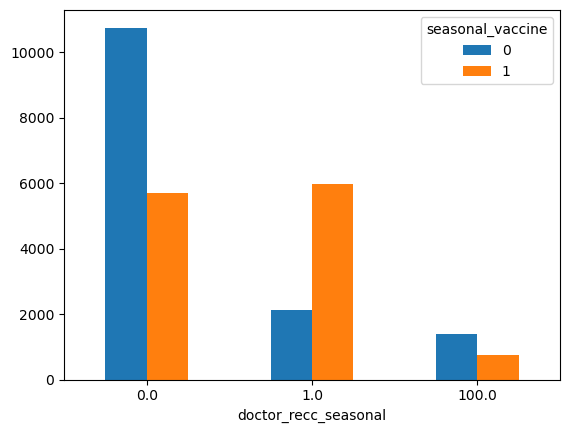

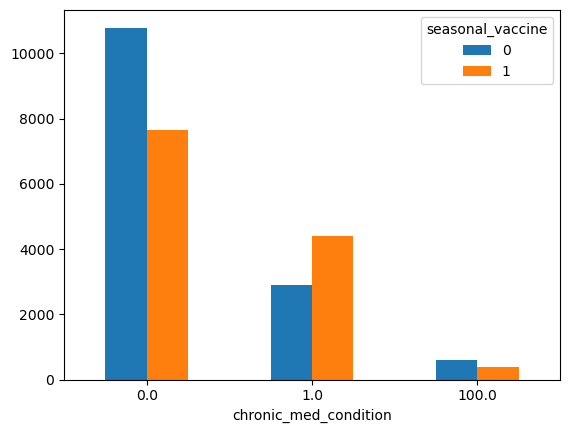

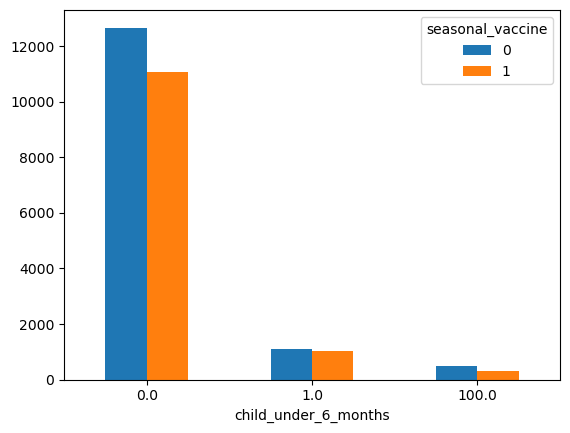

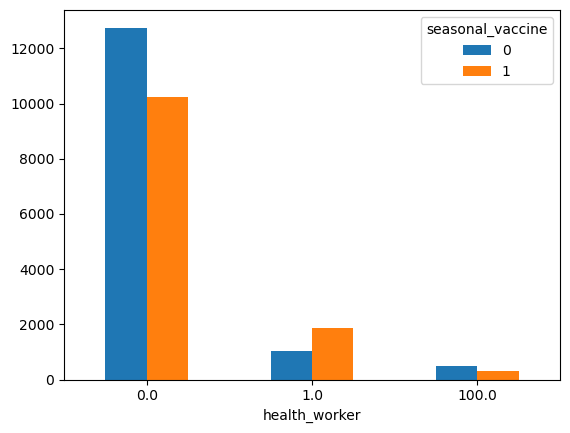

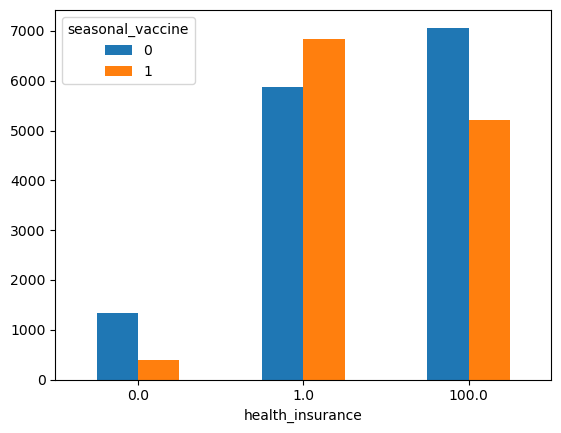

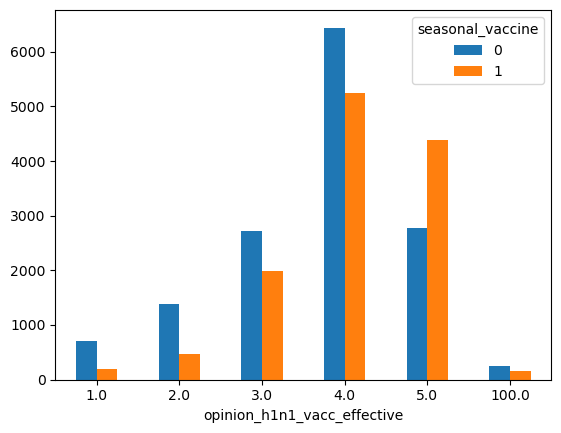

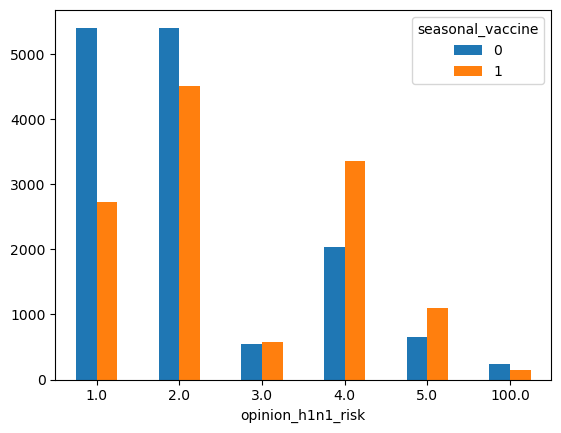

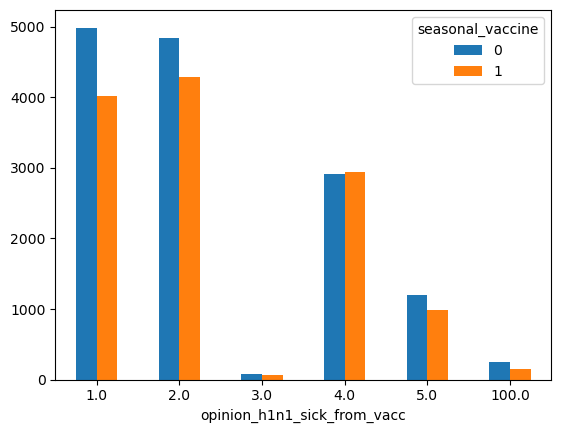

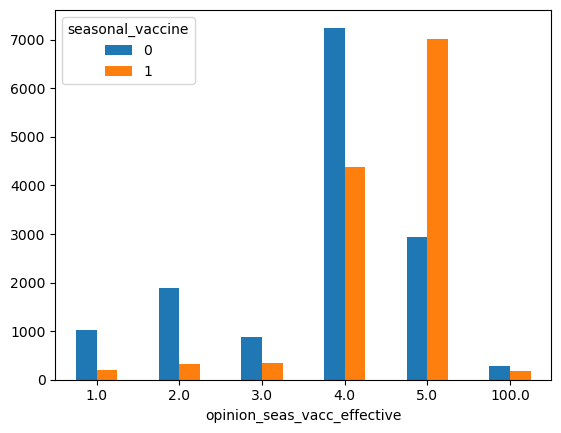

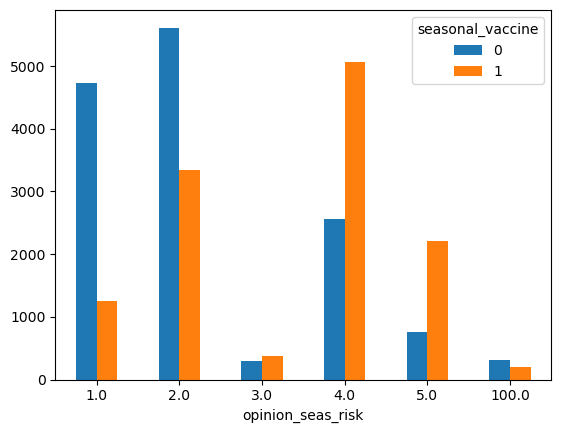

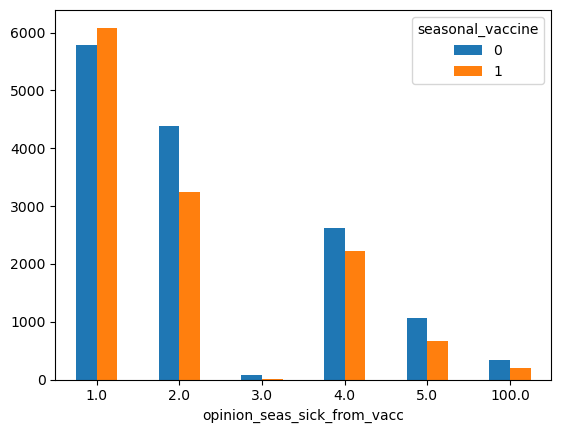

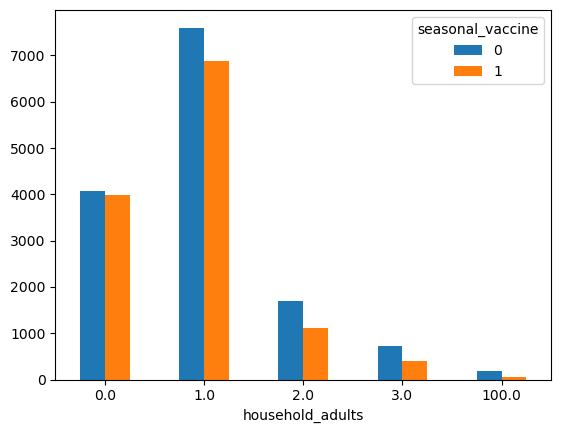

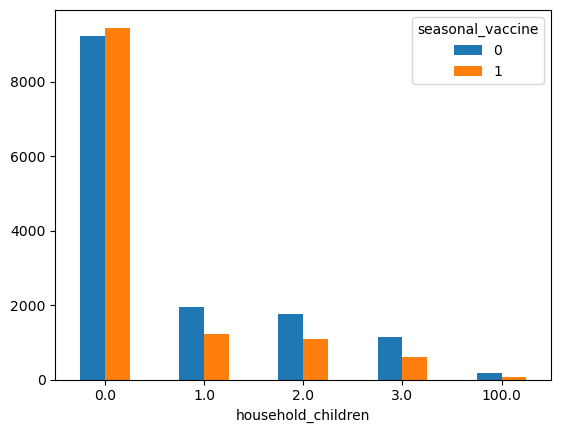

In [58]:
# Distribution of all continuous columns, grouped by target label 'seasonal_vaccine'
# Missing values were replaced with '100' for visualization
for col in continuous_cols:
    temp_df = data[[col, 'seasonal_vaccine']].copy()
    temp_df[col] = temp_df[col].fillna(100)
    cross_tab = pd.crosstab(temp_df[col], temp_df['seasonal_vaccine'])
    barplot = cross_tab.plot.bar(stacked=False, rot=0)
    plt.show()